#1 
IMPORTACIÓN DE LIBRERIAS numpy , pandas , matplotlib y skelarn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score


#IMPORTAR LinearSVC
from sklearn.svm import LinearSVC

#2
IMPORTACIÓN DEL DATASET = dateset1.csv

In [6]:
data = pd.read_csv("/Users/aaronmelamed/Downloads/dataset1.csv")
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']

df = data.copy()
df.head()

,X1,X2,y
0,0.04,0.40,1
1,-0.12,-0.62,-1
2,0.14,-0.42,-1
3,-0.05,-0.93,-1
4,0.60,-0.96,-1


#3 
UNIR COLUMNAS X1 Y X2

In [8]:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

#4
GRAFICA 2D

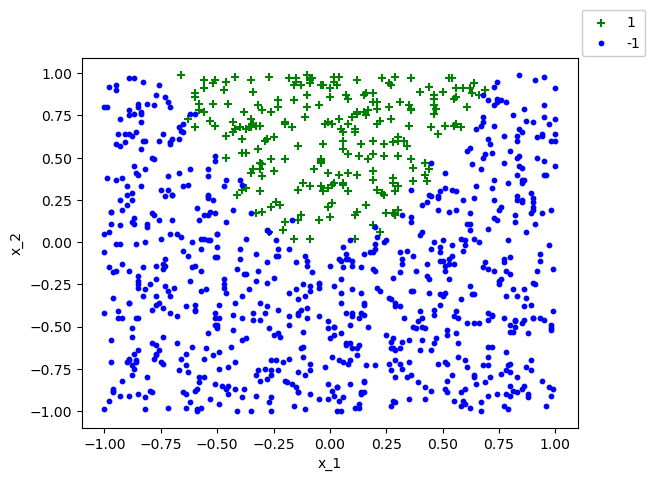

In [10]:
plt.scatter(X1[y==1], X2[y==1], c='g', marker = '+', label='1')
plt.scatter(X1[y==-1], X2[y==-1], c='b', marker = 'o', label='-1', s=10)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.15,1.15), loc='upper right', fancybox=True, framealpha=1, fontsize=10)

plt.savefig('Figure_1.png')

plt.show()

#5
CREACIÓN DE SET DE ENTRANAMIENTO Y SET DE PRUEBAS


In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2,random_state=4)
print('x_Train1 Set: ', x_train1.shape, y_train1.shape)
print('x_Test1 Set: ', x_test1.shape, y_test1.shape)

x_Train1 Set:  (799, 2) (799,)
x_Test1 Set:  (200, 2) (200,)


#6
INICIALIZAR Y ENTRAMIENTO REGRESIÓN LOGÍSTICA

In [14]:
LR1 = LogisticRegression()
LR1.fit(x_train1, y_train1)

LogisticRegression()

#7
MODELO DE REGRESIÓN LOGÍSTICA ENTRENADO

In [16]:
print('Modelos LR entrenado')
print('The slopes are: ',LR1.coef_[0])
print('The intercept is: ',LR1.intercept_)

Modelos LR entrenado
The slopes are:  [0.03493591 3.5322834 ]
The intercept is:  [-2.06813608]


#8
CALCULO DE LA PRESICIÓN UTILIZANDO LAS PREDICCIONES LOS VALORES OBJETIVOS DE LOS DATOS DE ENTRANAMIENTO 

In [18]:
y_pred  = LR1.predict(x_train1)
print('Predicciones en datos de entrenamiento y:', y_pred[:10])
score1 = LR1.score(x_train1, y_train1)
print('The score is: ',score1)

Predicciones en datos de entrenamiento y: [-1  1 -1  1 -1 -1 -1 -1 -1 -1]
The score is:  0.8197747183979975


#9 
AGREGAR LAS PREDICIONES AL GRÁFICO 2D DEL DATASET
y_pred = LR1.predict(x_train1)

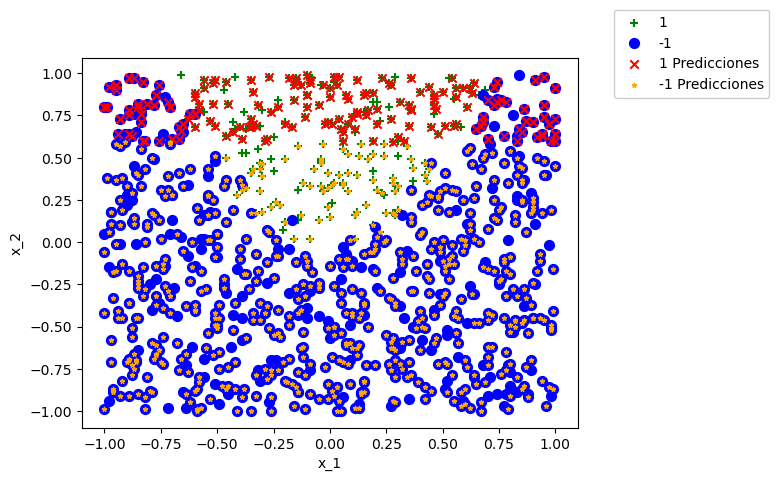

In [20]:
# Graficar los datos existentes punto (i)
plt.scatter(X1[y==1], X2[y==1], c='g', marker = '+', label='1')
plt.scatter(X1[y==-1], X2[y==-1], c='b', marker = 'o', label='-1', s=50)

# Añadir las predicciones al gráfico
plt.scatter(x_train1[:, 0][y_pred == 1], x_train1[:, 1][y_pred == 1], c='r', marker='x', label='1 Predicciones')
plt.scatter(x_train1[:, 0][y_pred == -1], x_train1[:, 1][y_pred == -1], c='orange', marker='*', label='-1 Predicciones', s=10)

# Configurar las etiquetas y leyenda
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.4, 1.15), loc='upper right', fancybox=True, framealpha=1, fontsize=10)

# Mostrar el gráfico
plt.show()

#10
AGREGAR LAS PREDICIONES AL GRÁFICO 2D DEL DATASET LA FRONTERA DE DECISIÓN

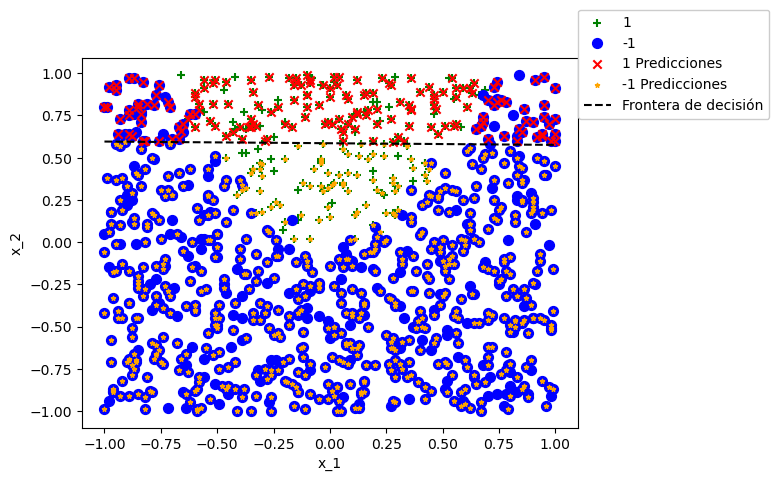

In [22]:
# Graficar los datos existentes punto (i)
plt.scatter(X1[y==1], X2[y==1], c='g', marker = '+', label='1')
plt.scatter(X1[y==-1], X2[y==-1], c='b', marker = 'o', label='-1', s=50)

# Crear una serie de puntos X1 para graficar la línea
x1_vals = np.linspace(min(X1), max(X1), 100)

# Calcular los valores correspondientes de X2 usando la fórmula de la frontera de decisión
x2_vals = -(LR1.coef_[0, 0] * x1_vals + LR1.intercept_[0]) / LR1.coef_[0, 1]

# Añadir las predicciones al gráfico
plt.scatter(x_train1[:, 0][y_pred == 1], x_train1[:, 1][y_pred == 1], c='r', marker='x', label='1 Predicciones')
plt.scatter(x_train1[:, 0][y_pred == -1], x_train1[:, 1][y_pred == -1], c='orange', marker='*', label='-1 Predicciones', s=10)

# Graficar la frontera de decisión
plt.plot(x1_vals, x2_vals, 'k--', label='Frontera de decisión')

# Configurar las etiquetas y leyenda
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.4, 1.15), loc='upper right', fancybox=True, framealpha=1, fontsize=10)

# Mostrar el gráfico
plt.show()

In [26]:
# Calcular la matriz de confusión
cm1 = metrics.confusion_matrix(y_train1, y_pred)
print('Confusion Matrix for Model 1:')
print(cm1)

# Report de precisión
cr = metrics.classification_report(y_train1, y_pred)
print(cr)

Confusion Matrix for Model 1:
[[545  66]
 [ 78 110]]
              precision    recall  f1-score   support

          -1       0.87      0.89      0.88       611
           1       0.62      0.59      0.60       188

    accuracy                           0.82       799
   macro avg       0.75      0.74      0.74       799
weighted avg       0.82      0.82      0.82       799



#11 
UTLIZAR LinearSVC para entrenar modelo.

In [172]:
# Definir los valores de C que deseas probar
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
SVCmodels = {}

for C in C_values:
    # Entrenar el clasificador LinearSVC
    SVCmodel = LinearSVC(C=C, max_iter=1000)
    SVCmodel.fit(X, y)
    
    # Guardar el modelo entrenado y sus parámetros
    SVCmodels[C] = SVCmodel
    print(f'Modelo entrenado con C={C}:')
    print(f'  Coeficientes: {SVCmodel.coef_}')
    print(f'  Intercepto: {SVCmodel.intercept_}')

Modelo entrenado con C=0.001:
  Coeficientes: [[0.003809   0.35468258]]
  Intercepto: [-0.35223202]
Modelo entrenado con C=0.01:
  Coeficientes: [[0.01317914 0.85869978]]
  Intercepto: [-0.54451629]
Modelo entrenado con C=0.1:
  Coeficientes: [[0.01561031 1.2679375 ]]
  Intercepto: [-0.71264918]
Modelo entrenado con C=1:
  Coeficientes: [[0.01610931 1.36423049]]
  Intercepto: [-0.75735403]
Modelo entrenado con C=10:
  Coeficientes: [[0.01623257 1.37525136]]
  Intercepto: [-0.76255648]
Modelo entrenado con C=100:
  Coeficientes: [[0.01624616 1.37637105]]
  Intercepto: [-0.76308617]


#12
GENERAR PREDICCIONES UTILIZANDO MODELO SVC

In [167]:
test_data = np.array([[0.5, 0.5]])
SVCpredictions = {C: SVCmodel.predict(test_data) for C, SVCmodel in SVCmodels.items()}
print('Predicciones para el nuevo punto:', SVCpredictions)

Predicciones para el nuevo punto: {0.001: array([-1]), 0.01: array([-1]), 0.1: array([-1]), 1: array([-1]), 10: array([-1]), 100: array([-1])}


#13
GRAFICAR LOS VALORES OBJETIVOS Y FRONTERA DE LOS DATOS

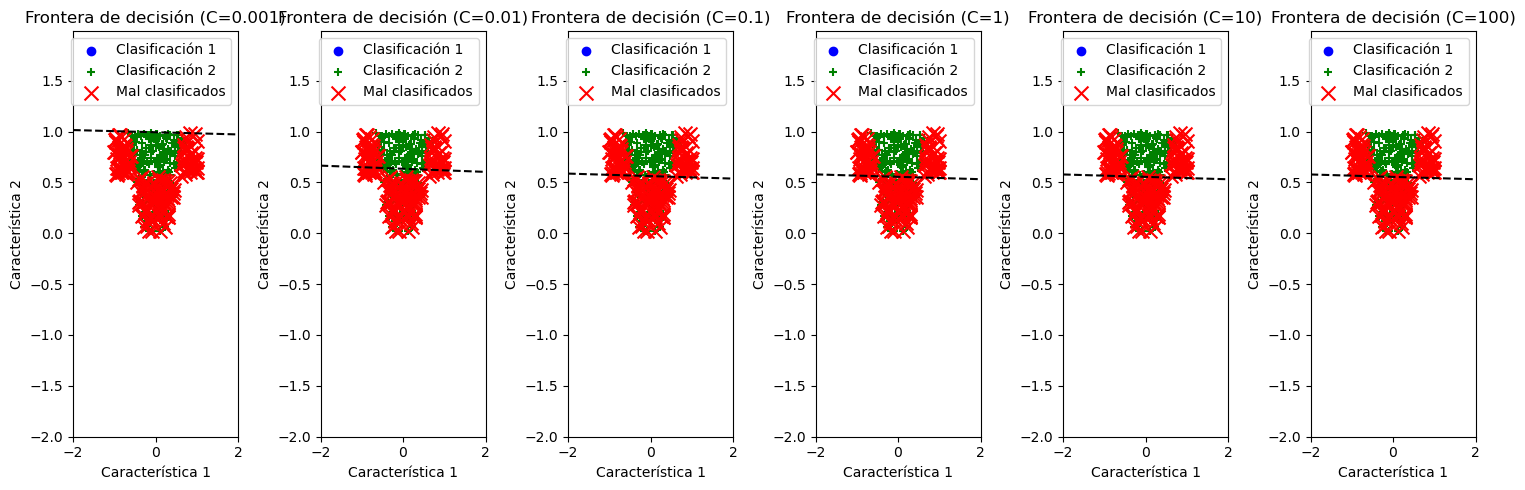

In [182]:
# Definir los límites para la gráfica
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Crear una figura para cada clasificador
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 5))

for i, (C, SVCmodel) in enumerate(SVCmodels.items()):
    ax = axes[i]
    
    # Predicciones en los datos de entrenamiento
    y_pred = model.predict(X)

    # Graficar los datos de entrenamiento con los colores reales
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Clasificación 1', marker='o')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Clasificación 2', marker='+')
    
    # Graficar las predicciones (puntos mal clasificados en rojo)
    ax.scatter(X[y_pred != y, 0], X[y_pred != y, 1], c='red', label='Mal clasificados',  s=100, marker='x')

    # Graficar la frontera de decisión
    Z = SVCmodel.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')  # Frontera de decisión

    # Configurar el gráfico
    ax.set_title(f"Frontera de decisión (C={C})")
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')
    ax.legend(loc='upper right')

# Mostrar los gráficos
plt.tight_layout()
plt.show()